Name: Gulnaz Serikbay<br>

15-288 Spring ’21 - Project<br>
A Query Answering Machine (QuAM) D2, D3<br>
Teacher: Gianni A. Di Caro<br>
TA: Eduardo Feo-Flushing<br>


1. D2.1: Data Collection <p>
2. D2.2: Data Analysis <p>
3. D2.3: Data Wrangling <p>
4. D2.4: Feature Engineering 
5. D3.1: Process Iterations


**D2.1: Data Collection**

Data was collected from the mobile application of IOS that tracks the health data allowed by the user. So the datasets for each user is different according to the settings established by the user. For example, one user might block the tracking option for walking speed, while the other user allows it.

All the available data from the health app was exported as xml file, which contained a spreadsheet with every data on one page from March 2020. I removed the columns with technical details and some tables that were private to a user.
Also, I selected the data from the most recent 2 months for every feature datasets (stepcount, walking speed, distance, etc) manually and rearranged them in separate csv files for convenience. This process took more time than expected as it was done manually and required good organization.

I will be importing the data from every feature from a separate csv file and concatenate relevant fields together.

This notebook demonstrates the process of Data cleaning on a set of datasets from one user.


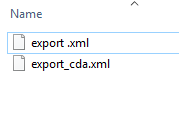
Image 1. exported dataset as xml file

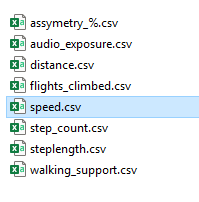
Image 2. Data files as csv files

**D2: Data Analysis & Data Wrangling**

In [191]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [192]:
stepcount = pd.read_csv("datasets/step_count.csv")
stepcount

,@_type,@_unit,@_creationDate,@_startDate,@_endDate,@_value
0,HKQuantityTypeIdentifierHeight,cm,2020-03-04 15:03:45 +0300,2020-03-04 15:03:45 +0300,2020-03-04 15:03:45 +0300,167.0
1,HKQuantityTypeIdentifierBodyMass,kg,2020-03-04 15:03:45 +0300,2020-03-04 15:03:45 +0300,2020-03-04 15:03:45 +0300,53.5
2,HKQuantityTypeIdentifierStepCount,count,2021-02-02 09:14:03 +0300,2021-02-02 09:03:00 +0300,2021-02-02 09:03:08 +0300,15.0
3,HKQuantityTypeIdentifierStepCount,count,2021-02-02 13:25:22 +0300,2021-02-02 13:14:20 +0300,2021-02-02 13:24:20 +0300,574.0
4,HKQuantityTypeIdentifierStepCount,count,2021-02-02 13:35:23 +0300,2021-02-02 13:24:20 +0300,2021-02-02 13:25:04 +0300,51.0
...,...,...,...,...,...,...
1398,HKQuantityTypeIdentifierStepCount,count,2021-04-03 17:47:20 +0300,2021-04-03 17:36:17 +0300,2021-04-03 17:39:12 +0300,263.0
1399,HKQuantityTypeIdentifierStepCount,count,2021-04-03 18:01:19 +0300,2021-04-03 17:50:16 +0300,2021-04-03 17:53:49 +0300,350.0
1400,HKQuantityTypeIdentifierStepCount,count,2021-04-03 18:38:14 +0300,2021-04-03 18:27:11 +0300,2021-04-03 18:27:13 +0300,8.0
1401,HKQuantityTypeIdentifierStepCount,count,2021-04-03 18:55:36 +0300,2021-04-03 18:44:33 +0300,2021-04-03 18:51:18 +0300,423.0


In [193]:
height = stepcount["@_value"][0]
mass = stepcount["@_value"][1]
mass

53.5

In [194]:
stepcount = stepcount.drop(stepcount.index[0:2])
stepcount = stepcount.reset_index(drop=True)
stepcount

,@_type,@_unit,@_creationDate,@_startDate,@_endDate,@_value
0,HKQuantityTypeIdentifierStepCount,count,2021-02-02 09:14:03 +0300,2021-02-02 09:03:00 +0300,2021-02-02 09:03:08 +0300,15.0
1,HKQuantityTypeIdentifierStepCount,count,2021-02-02 13:25:22 +0300,2021-02-02 13:14:20 +0300,2021-02-02 13:24:20 +0300,574.0
2,HKQuantityTypeIdentifierStepCount,count,2021-02-02 13:35:23 +0300,2021-02-02 13:24:20 +0300,2021-02-02 13:25:04 +0300,51.0
3,HKQuantityTypeIdentifierStepCount,count,2021-02-02 14:34:23 +0300,2021-02-02 14:23:20 +0300,2021-02-02 14:33:21 +0300,999.0
4,HKQuantityTypeIdentifierStepCount,count,2021-02-02 14:44:24 +0300,2021-02-02 14:33:21 +0300,2021-02-02 14:42:59 +0300,610.0
...,...,...,...,...,...,...
1396,HKQuantityTypeIdentifierStepCount,count,2021-04-03 17:47:20 +0300,2021-04-03 17:36:17 +0300,2021-04-03 17:39:12 +0300,263.0
1397,HKQuantityTypeIdentifierStepCount,count,2021-04-03 18:01:19 +0300,2021-04-03 17:50:16 +0300,2021-04-03 17:53:49 +0300,350.0
1398,HKQuantityTypeIdentifierStepCount,count,2021-04-03 18:38:14 +0300,2021-04-03 18:27:11 +0300,2021-04-03 18:27:13 +0300,8.0
1399,HKQuantityTypeIdentifierStepCount,count,2021-04-03 18:55:36 +0300,2021-04-03 18:44:33 +0300,2021-04-03 18:51:18 +0300,423.0


In [195]:
stepcount.isnull().sum()

@_type             0
@_unit             0
@_creationDate    19
@_startDate        0
@_endDate          0
@_value            0
dtype: int64

Creation date has a lot of missing values. Should be checked for all datasets:

In [196]:
#Open each dataset
distance = pd.read_csv("datasets/distance.csv")
assymetry = pd.read_csv("datasets/assymetry__.csv")
step_length = pd.read_csv("datasets/steplength.csv")
speed = pd.read_csv("datasets/speed.csv")
climbed_height = pd.read_csv("datasets/flights_climbed.csv")
walking_support = pd.read_csv("datasets/walking_support.csv")
audio_exposure = pd.read_csv("datasets/audio_exposure.csv")

##Checking for one more dataset:
print("DISTANCE: \n", distance.isnull().sum())
print("ASSYMETRY: \n", assymetry.isnull().sum())
print("STEPLENGTH: \n", step_length.isnull().sum())
print("SPEED: \n",speed.isnull().sum())
print("CLIMBED_HEIGHT: \n",climbed_height.isnull().sum())
print("AUDIO_EXPOSURE: \n", audio_exposure.isnull().sum())

DISTANCE: 
 @_type             0
@_unit             0
@_creationDate    15
@_startDate        0
@_endDate          0
@_value            7
dtype: int64
ASSYMETRY: 
 @_type            0
@_unit            0
@_creationDate    0
@_startDate       0
@_endDate         0
@_value           0
dtype: int64
STEPLENGTH: 
 @_type             1
@_unit             1
@_creationDate    20
@_startDate        0
@_endDate          0
@_value            5
dtype: int64
SPEED: 
 @_type             0
@_unit             0
@_creationDate    15
@_startDate        0
@_endDate          0
@_value            2
dtype: int64
CLIMBED_HEIGHT: 
 @_type            0
@_unit            0
@_creationDate    4
@_startDate       0
@_endDate         0
@_value           0
dtype: int64
AUDIO_EXPOSURE: 
 @_type            0
@_unit            0
@_creationDate    0
@_startDate       0
@_endDate         0
@_value           0
dtype: int64


Observation: creation date is has lots of missing values for several data, they might be related in timings for each dataset.
Conclusion: We can delete the column creation date as it is not important for the machine learning task, as it only records the time when the information about features was inserted to the dataset.

In [197]:
data = [stepcount, distance, assymetry, step_length, speed, climbed_height, walking_support, audio_exposure]
for i in data:
    type = i.iloc[0, 0].replace('HKQuantityTypeIdentifier', '')
    i.iloc[:, 0] = type 
    #exloring the shape of each of the datasets
    print(f"Dataset {i.iloc[0,0]} has shape: {i.shape} ")
    
    #deleting unrelevant field:
    if '@_creationDate' in i.columns:
        i.pop('@_creationDate')
    #converting into datetime type for convenience (and to extract features)
    i['@_startDate'] = pd.to_datetime(i['@_startDate'])
    i['@_endDate'] = pd.to_datetime(i['@_endDate'])  #, format='%Y-%m-%d %H:%M') # %H:%M')

#Displaying one of the datasets:
step_length

Dataset StepCount has shape: (1401, 6) 
Dataset DistanceWalkingRunning has shape: (1404, 6) 
Dataset WalkingAsymmetryPercentage has shape: (849, 6) 
Dataset WalkingStepLength has shape: (1404, 6) 
Dataset WalkingSpeed has shape: (1404, 6) 
Dataset FlightsClimbed has shape: (76, 6) 
Dataset WalkingDoubleSupportPercentage has shape: (1404, 6) 
Dataset HeadphoneAudioExposure has shape: (37, 6) 


,@_type,@_unit,@_startDate,@_endDate,@_value
0,WalkingStepLength,cm,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,80.0
1,WalkingStepLength,cm,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,71.0
2,WalkingStepLength,cm,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,62.0
3,WalkingStepLength,cm,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,70.0
4,WalkingStepLength,cm,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,59.0
...,...,...,...,...,...
1399,WalkingStepLength,cm,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,65.0
1400,WalkingStepLength,cm,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,59.0
1401,WalkingStepLength,cm,2021-04-03 19:50:16+03:00,2021-04-03 19:52:19+03:00,57.0
1402,WalkingStepLength,cm,2021-04-03 19:55:11+03:00,2021-04-03 19:56:08+03:00,61.0


Datasets "climbed height" and "audio_exposure" has significantly less records than other features!
One has 76 and the other has 37 data examples, respectively. It is reasonable to remove them from the dataset and not use them in the model development.

But additional check is needed for the dataset "assymetry".

In [198]:
assymetry

,@_type,@_unit,@_startDate,@_endDate,@_value
0,WalkingAsymmetryPercentage,%,2021-02-01 17:06:20+03:00,2021-02-01 17:06:41+03:00,0.00
1,WalkingAsymmetryPercentage,%,2021-02-01 17:06:57+03:00,2021-02-01 17:07:25+03:00,0.10
2,WalkingAsymmetryPercentage,%,2021-02-01 17:45:47+03:00,2021-02-01 17:46:14+03:00,0.10
3,WalkingAsymmetryPercentage,%,2021-02-01 19:20:26+03:00,2021-02-01 19:25:26+03:00,0.01
4,WalkingAsymmetryPercentage,%,2021-02-01 19:28:48+03:00,2021-02-01 19:33:47+03:00,0.06
...,...,...,...,...,...
844,WalkingAsymmetryPercentage,%,2021-04-03 17:16:00+03:00,2021-04-03 17:17:26+03:00,0.02
845,WalkingAsymmetryPercentage,%,2021-04-03 17:36:37+03:00,2021-04-03 17:38:06+03:00,0.02
846,WalkingAsymmetryPercentage,%,2021-04-03 17:50:22+03:00,2021-04-03 17:52:58+03:00,0.01
847,WalkingAsymmetryPercentage,%,2021-04-03 18:48:59+03:00,2021-04-03 18:49:51+03:00,0.00


In [199]:
assymetry.describe()

,@_value
count,849.000000
mean,0.027786
std,0.080016
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,0.670000


As seem from the visualization of the table, assymetry has quite different records in terms of time, and the values seem insignificant with maximum of 0.67 percent (less than 1%). While it might be naturally sensible to have these values for walking assymetry, it does not seem to contribute much to the task. STD is very small, so the values do not deviate from each other much, so I conclude that this feature will not contribute to my project task.

In [200]:
print("SPEED: \n",speed.isnull().sum())
print("SPEED: \n", distance.isnull().sum())

SPEED: 
 @_type         0
@_unit         0
@_startDate    0
@_endDate      0
@_value        2
dtype: int64
SPEED: 
 @_type         0
@_unit         0
@_startDate    0
@_endDate      0
@_value        7
dtype: int64


Datasets distance, stepcount, walkingsteplength, walking speed and walking support almost have the same number of rows, so let's check two of them first:

In [201]:
#changing the column labels to prevent the confusion betweent the same label names
distance.rename(columns={'@_startDate':'startDate'}, inplace=True)
distance.rename(columns={'@_endDate':'endDate'}, inplace=True)
distance.rename(columns={'@_unit':'unit'}, inplace=True)
distance.rename(columns={'@_value':'value'}, inplace=True)
distance.rename(columns = {'@_type':'type'}, inplace=True)


#creating a single dataframe:
data = pd.concat([stepcount, distance], axis = 1)
data

,@_type,@_unit,@_startDate,@_endDate,@_value,type,unit,startDate,endDate,value
0,StepCount,count,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,15.0,DistanceWalkingRunning,km,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,0.009430
1,StepCount,count,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,574.0,DistanceWalkingRunning,km,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,0.446350
2,StepCount,count,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,51.0,DistanceWalkingRunning,km,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,0.036280
3,StepCount,count,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,999.0,DistanceWalkingRunning,km,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,0.612642
4,StepCount,count,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,610.0,DistanceWalkingRunning,km,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,0.390909
...,...,...,...,...,...,...,...,...,...,...
1399,StepCount,count,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,423.0,DistanceWalkingRunning,km,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,0.005520
1400,StepCount,count,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,45.0,DistanceWalkingRunning,km,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,0.007400
1401,NaN,NaN,NaT,NaT,NaN,DistanceWalkingRunning,km,2021-04-03 19:50:16+03:00,2021-04-03 19:52:19+03:00,0.197766
1402,NaN,NaN,NaT,NaT,NaN,DistanceWalkingRunning,km,2021-04-03 19:55:11+03:00,2021-04-03 19:56:08+03:00,0.191608


Distance contains 3 more fields, so it is reasonable to drop those excess fields to equate the shape of 2 datasets.
Moreover, time columns seem to be the same for two.

In [202]:
data = data.drop(data.index[-3:])
data

,@_type,@_unit,@_startDate,@_endDate,@_value,type,unit,startDate,endDate,value
0,StepCount,count,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,15.0,DistanceWalkingRunning,km,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,0.009430
1,StepCount,count,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,574.0,DistanceWalkingRunning,km,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,0.446350
2,StepCount,count,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,51.0,DistanceWalkingRunning,km,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,0.036280
3,StepCount,count,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,999.0,DistanceWalkingRunning,km,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,0.612642
4,StepCount,count,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,610.0,DistanceWalkingRunning,km,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,0.390909
...,...,...,...,...,...,...,...,...,...,...
1396,StepCount,count,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,263.0,DistanceWalkingRunning,km,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,0.005440
1397,StepCount,count,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,350.0,DistanceWalkingRunning,km,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,0.046300
1398,StepCount,count,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,8.0,DistanceWalkingRunning,km,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,0.006000
1399,StepCount,count,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,423.0,DistanceWalkingRunning,km,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,0.005520


In [203]:
data.isnull().sum()

@_type         0
@_unit         0
@_startDate    0
@_endDate      0
@_value        0
type           0
unit           0
startDate      0
endDate        0
value          7
dtype: int64

Data contains 7 missing values for the distance values, it's reasonable to fill them with forward fill method as it's time-series data

In [204]:
data["value"] = data["value"].fillna(method='ffill')
data.isnull().sum()

@_type         0
@_unit         0
@_startDate    0
@_endDate      0
@_value        0
type           0
unit           0
startDate      0
endDate        0
value          0
dtype: int64

With check, I can drop 
1. duplicate datetime columns
2. 'Unit' columns as they are the same for all records

Also, I should replace the 'values' column labels with "@_type" column values, and drop excess fields: 

In [205]:

if (data["@_startDate"] == data["startDate"]).all():
    data = data.drop(['startDate'], axis=1)
if (data["@_endDate"] == data["endDate"]).all():
    data = data.drop(['endDate'], axis=1)
if (data["@_unit"] == data["@_unit"][0]).all():
     data = data.drop(['@_unit'], axis=1)
if (data["unit"] == data["unit"][0]).all():
     data = data.drop(['unit'], axis=1)
data.rename(columns = {'value':f'{data["type"][0]}'}, inplace=True)
data = data.drop(['type'], axis=1)
data.rename(columns = {'@_value':f'{data["@_type"][0]}'}, inplace=True)
data = data.drop(['@_type'], axis=1)
data

,@_startDate,@_endDate,StepCount,DistanceWalkingRunning
0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,15.0,0.009430
1,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,574.0,0.446350
2,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,51.0,0.036280
3,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,999.0,0.612642
4,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,610.0,0.390909
...,...,...,...,...
1396,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,263.0,0.005440
1397,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,350.0,0.046300
1398,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,8.0,0.006000
1399,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,423.0,0.005520


Now, I have to do the same procedure for other datasets by concatenating them to this main dataframe.

In [206]:

datasets = [step_length, speed, walking_support]
for i in range(len(datasets)):
    datasets[i].rename(columns={'@_startDate':f'startDate{i}'}, inplace=True)
    datasets[i].rename(columns={'@_endDate':f'endDate{i}'}, inplace=True)
    datasets[i] = datasets[i].drop(['@_unit'], axis=1)
    datasets[i].rename(columns = {'@_value':f'{datasets[i]["@_type"][0]}'}, inplace=True)
    datasets[i] = datasets[i].drop(['@_type'], axis=1)
    distance.rename(columns = {'@_type':'type'}, inplace=True)
    #concatenate:
    data = pd.concat([data, datasets[i]], axis = 1)
data

,@_startDate,@_endDate,StepCount,DistanceWalkingRunning,startDate0,endDate0,WalkingStepLength,startDate1,endDate1,WalkingSpeed,startDate2,endDate2,WalkingDoubleSupportPercentage
0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,15.0,0.009430,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,80.0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,5.868,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,0.233
1,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,574.0,0.446350,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,71.0,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,5.220,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,0.278
2,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,51.0,0.036280,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,62.0,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,3.888,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,0.317
3,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,999.0,0.612642,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,70.0,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,4.212,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,0.312
4,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,610.0,0.390909,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,59.0,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,3.240,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,423.0,0.005520,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,65.0,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,4.824,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,0.252
1400,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,45.0,0.007400,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,59.0,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,4.284,2021-04-03 18:55:01+03:00,2021-04-03 19:03:19+03:00,0.289
1401,NaT,NaT,NaN,NaN,2021-04-03 19:50:16+03:00,2021-04-03 19:52:19+03:00,57.0,2021-04-03 19:50:16+03:00,2021-04-03 19:52:19+03:00,4.428,2021-04-03 19:50:16+03:00,2021-04-03 19:52:19+03:00,0.309
1402,NaT,NaT,NaN,NaN,2021-04-03 19:55:11+03:00,2021-04-03 19:56:08+03:00,61.0,2021-04-03 19:55:11+03:00,2021-04-03 19:56:08+03:00,4.428,2021-04-03 19:55:11+03:00,2021-04-03 19:56:08+03:00,0.288


In [207]:
data = data.drop(data.index[-3:])
#confirming the time columns are the same:
for i in range(len(datasets)):
    if (data["@_startDate"] == data[f"startDate{i}"]).all():
        data = data.drop([f'startDate{i}'], axis=1)
    if (data["@_endDate"] == data[f"endDate{i}"]).all():
        data = data.drop([f'endDate{i}'], axis=1)
data   

,@_startDate,@_endDate,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage
0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,15.0,0.009430,80.0,5.868,0.233
1,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,574.0,0.446350,71.0,5.220,0.278
2,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,51.0,0.036280,62.0,3.888,0.317
3,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,999.0,0.612642,70.0,4.212,0.312
4,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,610.0,0.390909,59.0,3.240,0.300
...,...,...,...,...,...,...,...
1396,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,263.0,0.005440,50.0,3.240,0.312
1397,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,350.0,0.046300,56.0,3.492,0.307
1398,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,8.0,0.006000,43.0,3.060,0.318
1399,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,423.0,0.005520,65.0,4.824,0.252


In [208]:
data.isnull().sum()

@_startDate                       0
@_endDate                         0
StepCount                         0
DistanceWalkingRunning            0
WalkingStepLength                 4
WalkingSpeed                      2
WalkingDoubleSupportPercentage    0
dtype: int64

Dataset is now quite clean with only 6 missing examples from 2 columns. I can use the backfill and forwardfill methods to impute the values!

In [209]:
data["WalkingStepLength"] = data["WalkingStepLength"].fillna(method='ffill')
data["WalkingSpeed"] = data["WalkingSpeed"].fillna(method='ffill')
data.isnull().sum()

@_startDate                       0
@_endDate                         0
StepCount                         0
DistanceWalkingRunning            0
WalkingStepLength                 0
WalkingSpeed                      0
WalkingDoubleSupportPercentage    0
dtype: int64

In [210]:
data

,@_startDate,@_endDate,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage
0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,15.0,0.009430,80.0,5.868,0.233
1,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,574.0,0.446350,71.0,5.220,0.278
2,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,51.0,0.036280,62.0,3.888,0.317
3,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,999.0,0.612642,70.0,4.212,0.312
4,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,610.0,0.390909,59.0,3.240,0.300
...,...,...,...,...,...,...,...
1396,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,263.0,0.005440,50.0,3.240,0.312
1397,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,350.0,0.046300,56.0,3.492,0.307
1398,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,8.0,0.006000,43.0,3.060,0.318
1399,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,423.0,0.005520,65.0,4.824,0.252


**Normalization**

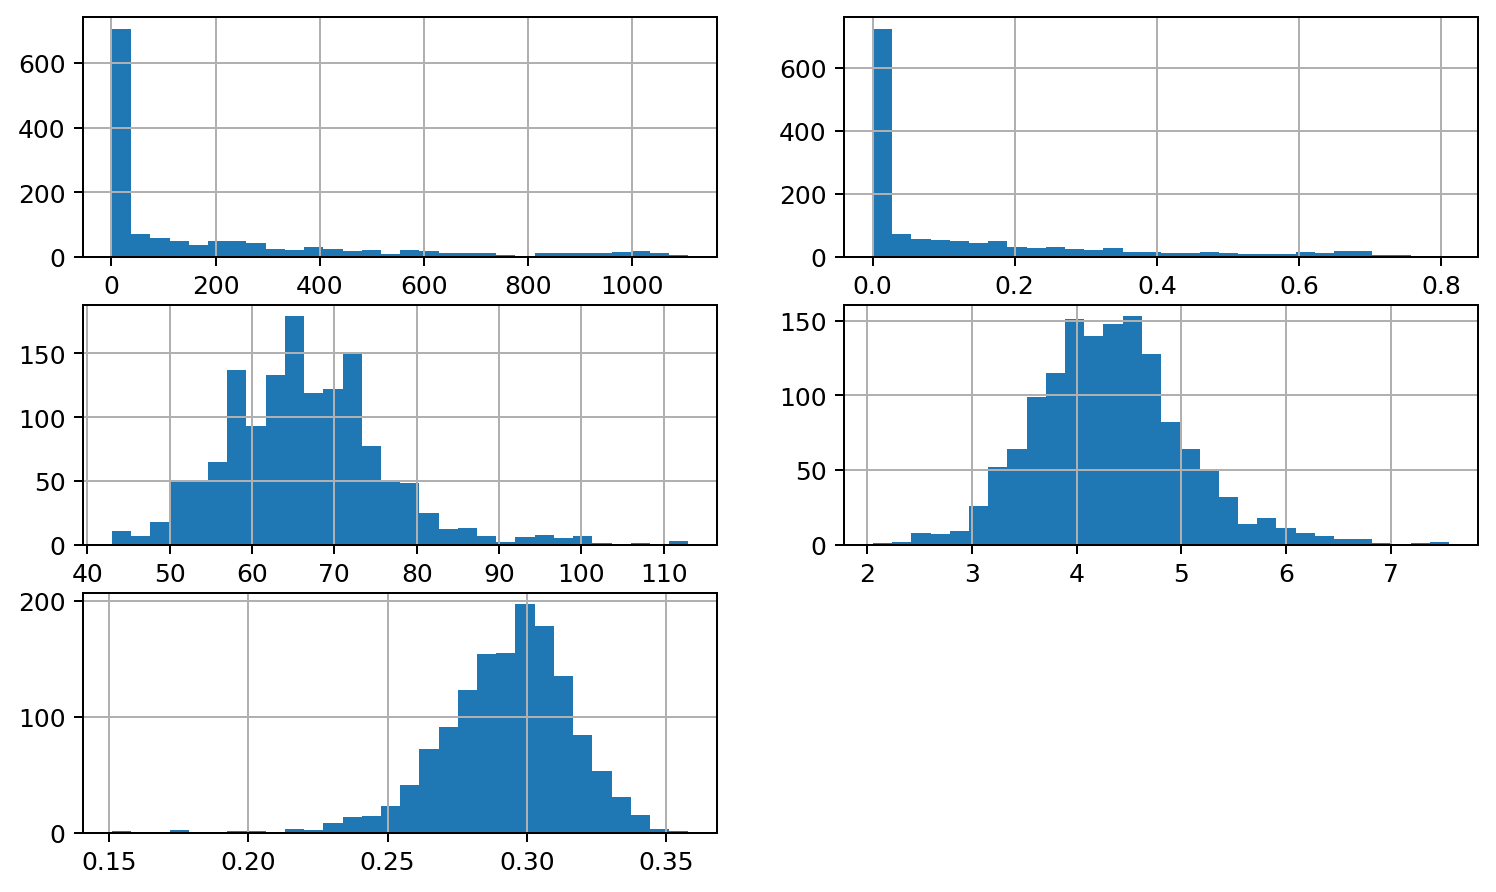

In [211]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 180

plotting_features = ['StepCount','DistanceWalkingRunning', 'WalkingStepLength', 'WalkingSpeed', 'WalkingDoubleSupportPercentage']
labels = ['Accuracy', 'SSD', 'Computational time, ms', 'Number of iterations', 'hey']

ax1 = plt.subplot(321)
data["StepCount"].hist(figsize = (10, 6), bins = 30)

ax2 = plt.subplot(322)
data["DistanceWalkingRunning"].hist(figsize = (10, 6), bins = 30)

ax3 = plt.subplot(323)
data["WalkingStepLength"].hist(figsize = (10, 6), bins = 30)

ax4 = plt.subplot(324)
data["WalkingSpeed"].hist(figsize = (10, 6), bins = 30)

ax5 = plt.subplot(325)
data["WalkingDoubleSupportPercentage"].hist(figsize = (10, 6), bins = 30)

plt.show()

In [212]:
orig_data = data.copy()

Steplength, walking speed and walking Double Support Percentage data seem to be normalized. I will normalize the fields individually column by column:

In [213]:
from sklearn import preprocessing
columns = data.columns
two_columns = data.iloc[:, :2]
normalized = preprocessing.normalize(data.iloc[:, 2:], norm = 'l2', axis = 0)
data = pd.DataFrame(normalized)
data.columns = columns[2:]
data = pd.concat([two_columns, data])
data.iloc[:,2:] = data.iloc[:, 2:].shift(-1401)
data = data.iloc[:1401,:]
data

,@_startDate,@_endDate,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage
0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,0.001165,0.001084,0.031915,0.035804,0.021157
1,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,0.044581,0.051313,0.028325,0.031850,0.025244
2,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,0.003961,0.004171,0.024734,0.023723,0.028785
3,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,0.077590,0.070430,0.027926,0.025700,0.028331
4,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,0.047377,0.044939,0.023537,0.019769,0.027241
...,...,...,...,...,...,...,...
1396,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,0.020427,0.000625,0.019947,0.019769,0.028331
1397,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,0.027184,0.005323,0.022341,0.021306,0.027877
1398,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,0.000621,0.000690,0.017154,0.018671,0.028876
1399,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,0.032853,0.000635,0.025931,0.029434,0.022883


In [214]:
data.isnull().sum()

@_startDate                       0
@_endDate                         0
StepCount                         0
DistanceWalkingRunning            0
WalkingStepLength                 0
WalkingSpeed                      0
WalkingDoubleSupportPercentage    0
dtype: int64

**Check for stationarity**

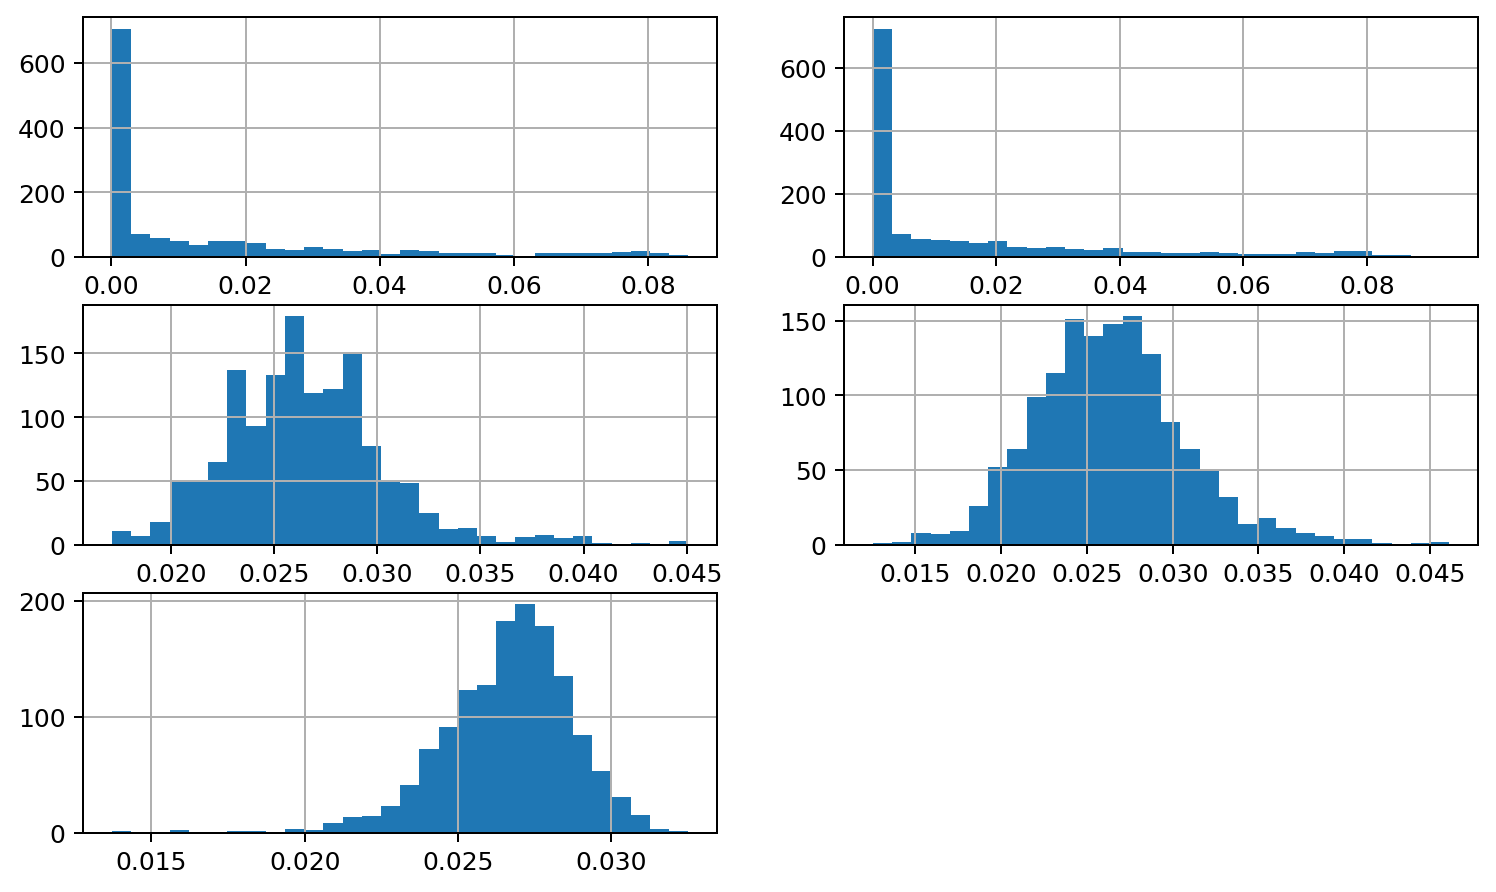

In [215]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 180

plotting_features = ['StepCount','DistanceWalkingRunning', 'WalkingStepLength', 'WalkingSpeed', 'WalkingDoubleSupportPercentage']
labels = ['Accuracy', 'SSD', 'Computational time, ms', 'Number of iterations', 'hey']

ax1 = plt.subplot(321)
data["StepCount"].hist(figsize = (10, 6), bins = 30)

ax2 = plt.subplot(322)
data["DistanceWalkingRunning"].hist(figsize = (10, 6), bins = 30)

ax3 = plt.subplot(323)
data["WalkingStepLength"].hist(figsize = (10, 6), bins = 30)

ax4 = plt.subplot(324)
data["WalkingSpeed"].hist(figsize = (10, 6), bins = 30)

ax5 = plt.subplot(325)
data["WalkingDoubleSupportPercentage"].hist(figsize = (10, 6), bins = 30)

plt.show()



In [216]:
rows = data.shape[0]
data1 = data.iloc[:rows//5, :]
data2 = data.iloc[rows//5 : 2*rows//5, :]
data3 = data.iloc[2*rows//5 : 3*rows//5, :]
data4 = data.iloc[3*rows//5 : 4*rows//5, :]
data5 = data.iloc[4*rows//5:, :]

I will be checking the mean and std distribution over 5 splits for every column data to check the stationarity. If they are more or less equal, data is concluded to be stationary.

In [217]:
frags = [data1, data2, data3, data4, data5]
for c in data.columns[2:]:
    print(f"stats for {c}: ")
    for i in range(len(frags)):
        print(f"Mean of the split {i+1}: ", frags[i][c].mean())
        print(f"Std of the split {i+1}: ", frags[i][c].std())
    print("\n")

stats for StepCount: 
Mean of the split 1:  0.021972176653924518
Std of the split 1:  0.02460172572553992
Mean of the split 2:  0.010080705498622998
Std of the split 2:  0.0192354534023937
Mean of the split 3:  0.012899763612719786
Std of the split 3:  0.02241466998401647
Mean of the split 4:  0.01331056997570093
Std of the split 4:  0.02074107927005148
Mean of the split 5:  0.018341172809842182
Std of the split 5:  0.020119954856696712


stats for DistanceWalkingRunning: 
Mean of the split 1:  0.022023978654273656
Std of the split 1:  0.024866849256852747
Mean of the split 2:  0.009770790473114849
Std of the split 2:  0.018844599652942454
Mean of the split 3:  0.012928793129872912
Std of the split 3:  0.022335655461468828
Mean of the split 4:  0.013121392336288432
Std of the split 4:  0.021041446074010477
Mean of the split 5:  0.018224346493775963
Std of the split 5:  0.02024854454836738


stats for WalkingStepLength: 
Mean of the split 1:  0.02655084827349977
Std of the split 1:  0.0

From the distribution statistics for every column, data seems like stationary.

In [218]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data["StepCount"])
adf_test

(-4.051576956468352,
 0.0011632602934323701,
 22,
 1378,
 {'1%': -3.4351043710114393,
  '5%': -2.863639705119746,
  '10%': -2.5678878798704923},
 -7088.162037126685)

ADF-value is less than -3.435, so I can conclude that the data is stationary

In [219]:
adf_test2 = adfuller(data["DistanceWalkingRunning"])
adf_test2

(-4.038176931026956,
 0.001223283476919542,
 22,
 1378,
 {'1%': -3.4351043710114393,
  '5%': -2.863639705119746,
  '10%': -2.5678878798704923},
 -7082.240677729724)

In [220]:
adf_test3 = adfuller(data["WalkingStepLength"])
adf_test3

(-12.019765698469103,
 3.0427520195624543e-22,
 4,
 1396,
 {'1%': -3.435042954953382,
  '5%': -2.8636126027916173,
  '10%': -2.567873447118661},
 -11523.424064657856)

In [221]:
adf_test4 = adfuller(data["WalkingSpeed"])
adf_test4

(-12.372857528620749,
 5.233930802715822e-23,
 4,
 1396,
 {'1%': -3.435042954953382,
  '5%': -2.8636126027916173,
  '10%': -2.567873447118661},
 -11132.533366156582)

In [222]:
adf_test5 = adfuller(data["WalkingDoubleSupportPercentage"])
adf_test5

(-10.668516350765463,
 4.225891833792431e-19,
 6,
 1394,
 {'1%': -3.43504970049035,
  '5%': -2.8636155795606397,
  '10%': -2.5678750323275197},
 -13227.130751658897)

All fields are stationary time-series fields. No need to detrend the data.


**D2.4:Feature Engineering**

In [223]:
#Creating datetime features:
data['@_startDate'] = pd.to_datetime(data['@_startDate'])
data['@_endDate'] = pd.to_datetime(data['@_endDate'])
    
data['s_month'] = data['@_startDate'].dt.month 
data['s_day']   = data['@_startDate'].dt.day
data['s_hour']   = data['@_startDate'].dt.hour
data['s_minute']   = data['@_startDate'].dt.minute
data['s_second'] = data['@_startDate'].dt.second
data['weekday'] = data['@_startDate'].dt.weekday 

data['is_weekend'] = data['weekday'] >= 5
    #(data['weekday'] == 4).all() or (data['weekday'] == 5).all())

#create a duration feature
data['duration']   = data['@_endDate'] - data['@_startDate']

data['e_month'] = data['@_endDate'].dt.month 
data['e_day']   = data['@_endDate'].dt.day
data['e_hour']   = data['@_endDate'].dt.hour
data['e_minute']   = data['@_endDate'].dt.minute
data['e_second'] = data['@_endDate'].dt.second


data

,@_startDate,@_endDate,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage,s_month,s_day,s_hour,s_minute,s_second,weekday,is_weekend,duration,e_month,e_day,e_hour,e_minute,e_second
0,2021-02-02 09:03:00+03:00,2021-02-02 09:03:08+03:00,0.001165,0.001084,0.031915,0.035804,0.021157,2,2,9,3,0,1,False,0 days 00:00:08,2,2,9,3,8
1,2021-02-02 13:14:20+03:00,2021-02-02 13:24:20+03:00,0.044581,0.051313,0.028325,0.031850,0.025244,2,2,13,14,20,1,False,0 days 00:10:00,2,2,13,24,20
2,2021-02-02 13:24:20+03:00,2021-02-02 13:25:04+03:00,0.003961,0.004171,0.024734,0.023723,0.028785,2,2,13,24,20,1,False,0 days 00:00:44,2,2,13,25,4
3,2021-02-02 14:23:20+03:00,2021-02-02 14:33:21+03:00,0.077590,0.070430,0.027926,0.025700,0.028331,2,2,14,23,20,1,False,0 days 00:10:01,2,2,14,33,21
4,2021-02-02 14:33:21+03:00,2021-02-02 14:42:59+03:00,0.047377,0.044939,0.023537,0.019769,0.027241,2,2,14,33,21,1,False,0 days 00:09:38,2,2,14,42,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2021-04-03 17:36:17+03:00,2021-04-03 17:39:12+03:00,0.020427,0.000625,0.019947,0.019769,0.028331,4,3,17,36,17,5,True,0 days 00:02:55,4,3,17,39,12
1397,2021-04-03 17:50:16+03:00,2021-04-03 17:53:49+03:00,0.027184,0.005323,0.022341,0.021306,0.027877,4,3,17,50,16,5,True,0 days 00:03:33,4,3,17,53,49
1398,2021-04-03 18:27:11+03:00,2021-04-03 18:27:13+03:00,0.000621,0.000690,0.017154,0.018671,0.028876,4,3,18,27,11,5,True,0 days 00:00:02,4,3,18,27,13
1399,2021-04-03 18:44:33+03:00,2021-04-03 18:51:18+03:00,0.032853,0.000635,0.025931,0.029434,0.022883,4,3,18,44,33,5,True,0 days 00:06:45,4,3,18,51,18


Seems like differentiating start hour, start minute, end hour, end .... doesn't make sense, so decided to:
1. data.index = data['@_startDate']
2. extract the duration in seconds from duration column,
3. delete the "duration", "@_endDate" field with datetimedelta type,



In [224]:
data.index = data['@_startDate']

Time to explore the correations!

<AxesSubplot:>

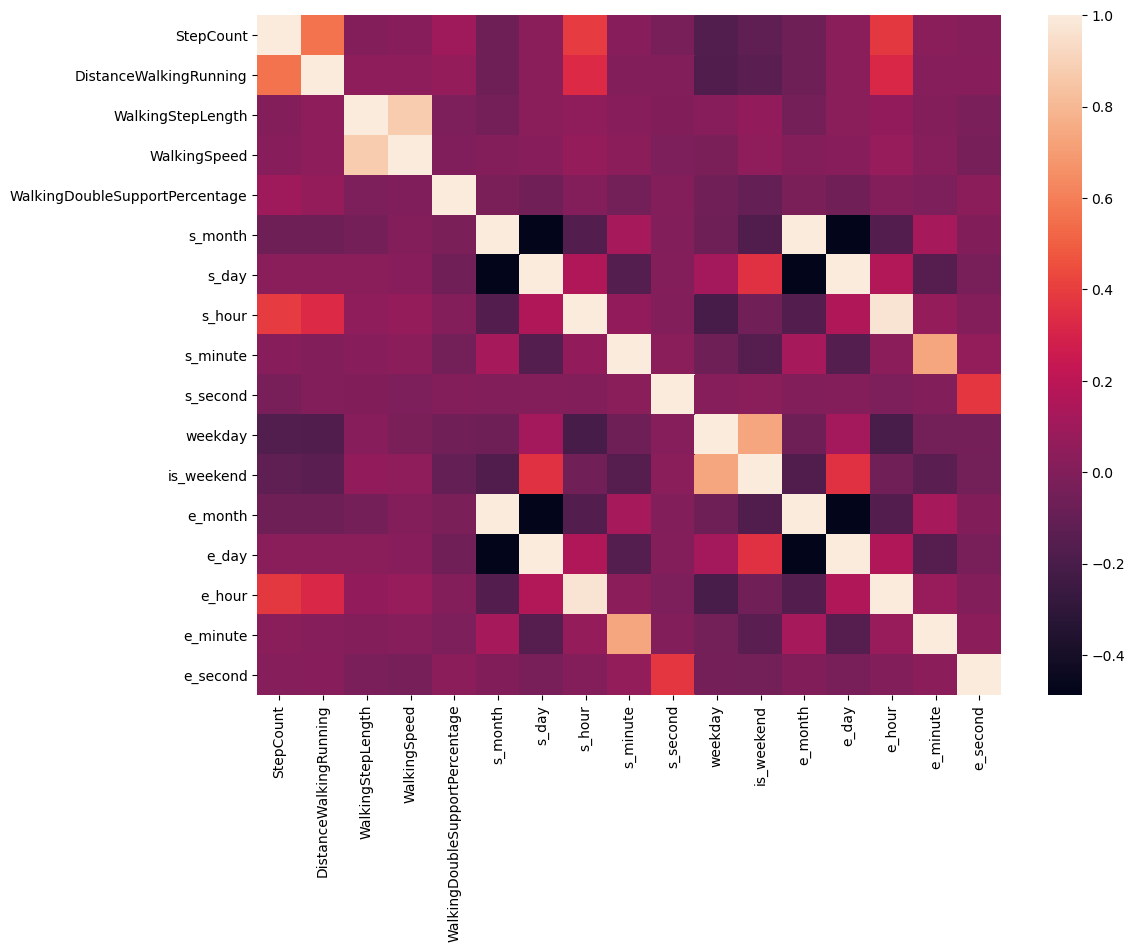

In [225]:
#correlation matrix:
corr = data.corr()

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
matplotlib.rcParams['figure.dpi']= 100 

plt.figure(figsize = (12,9))

sb.heatmap(corr, 
             xticklabels=corr.columns, 
             yticklabels=corr.columns)
#NOTE: StepCount is target

- The most correlated feature with the target field is DistanceWalkingRunning, which makes sense in the context. 
- According to the heatmap, there is also a correlation between steplength and walking speed features, but as the correlation is not that high, I decided to keep them. I might risk losing data if I would drop one of them.

In [226]:
dropping_cols = ['s_minute', 's_second', 'e_month', 'e_day', 'e_hour', 'e_minute', 'e_second', 'duration', '@_endDate', '@_startDate']
data['seconds_active'] = data['duration'].dt.total_seconds()
for i in dropping_cols:
    data.pop(i)

data

,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage,s_month,s_day,s_hour,weekday,is_weekend,seconds_active
@_startDate,,,,,,,,,,,
2021-02-02 09:03:00+03:00,0.001165,0.001084,0.031915,0.035804,0.021157,2,2,9,1,False,8.0
2021-02-02 13:14:20+03:00,0.044581,0.051313,0.028325,0.031850,0.025244,2,2,13,1,False,600.0
2021-02-02 13:24:20+03:00,0.003961,0.004171,0.024734,0.023723,0.028785,2,2,13,1,False,44.0
2021-02-02 14:23:20+03:00,0.077590,0.070430,0.027926,0.025700,0.028331,2,2,14,1,False,601.0
2021-02-02 14:33:21+03:00,0.047377,0.044939,0.023537,0.019769,0.027241,2,2,14,1,False,578.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-03 17:36:17+03:00,0.020427,0.000625,0.019947,0.019769,0.028331,4,3,17,5,True,175.0
2021-04-03 17:50:16+03:00,0.027184,0.005323,0.022341,0.021306,0.027877,4,3,17,5,True,213.0
2021-04-03 18:27:11+03:00,0.000621,0.000690,0.017154,0.018671,0.028876,4,3,18,5,True,2.0


Explore the dataset:

In [227]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StepCount,1401.0,0.015323,0.021893,0.000078,0.000699,0.002796,0.022135,0.086056
DistanceWalkingRunning,1401.0,0.015216,0.021968,0.000035,0.000691,0.002506,0.021711,0.093333
WalkingStepLength,1401.0,0.026434,0.003877,0.017154,0.023936,0.026330,0.028724,0.045080
WalkingSpeed,1401.0,0.026348,0.004426,0.012520,0.023283,0.026139,0.028994,0.046127
WalkingDoubleSupportPercentage,1401.0,0.026637,0.002062,0.013711,0.025425,0.026787,0.027968,0.032508
s_month,1401.0,2.584582,0.537339,2.000000,2.000000,3.000000,3.000000,4.000000
s_day,1401.0,15.825125,9.049631,1.000000,6.000000,15.000000,25.000000,31.000000
s_hour,1401.0,12.474661,6.287593,0.000000,9.000000,13.000000,18.000000,23.000000
weekday,1401.0,3.636688,1.632280,0.000000,3.000000,4.000000,5.000000,6.000000
seconds_active,1401.0,216.812991,245.585523,2.000000,5.000000,64.000000,495.000000,601.000000


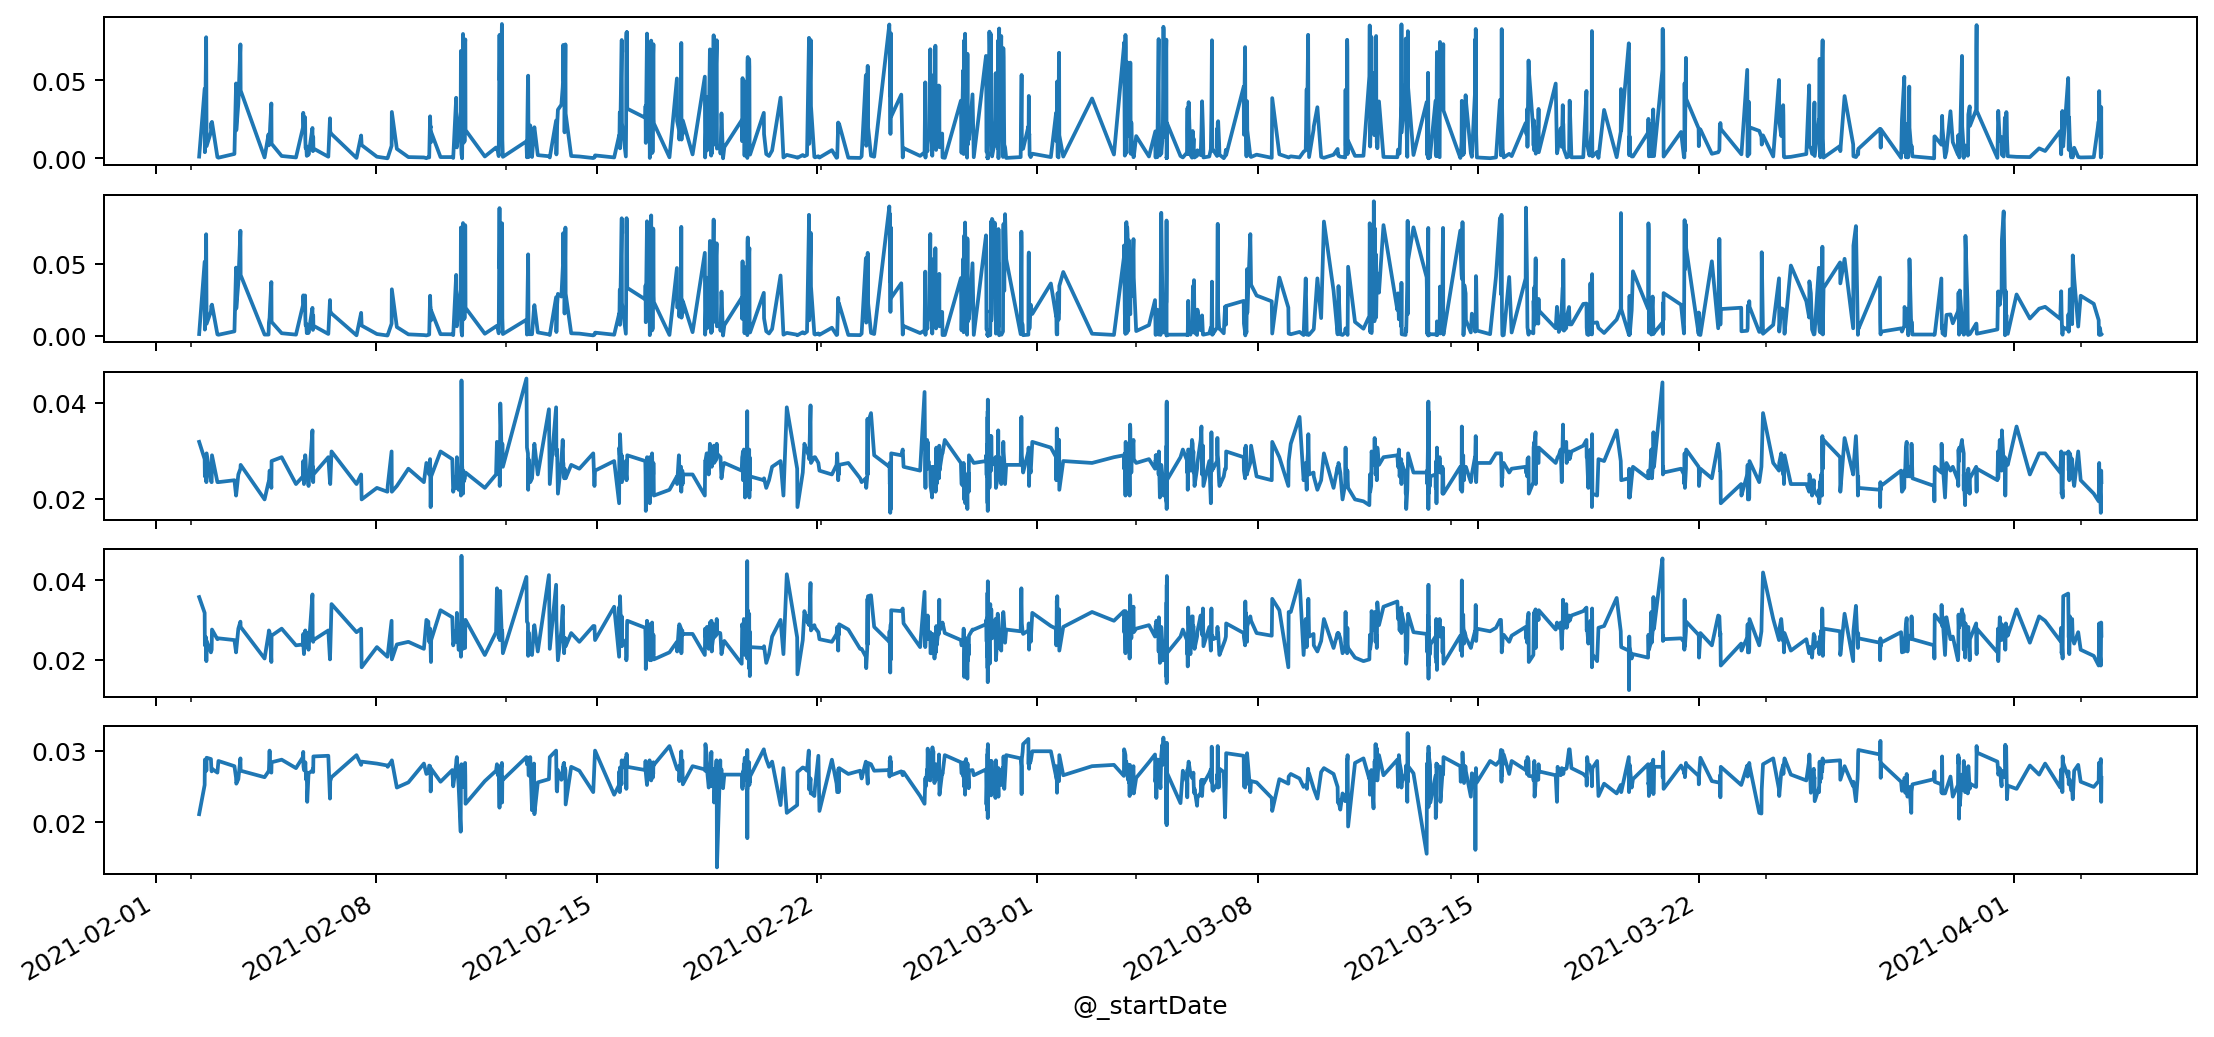

In [228]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 180

plotting_features = ['StepCount','DistanceWalkingRunning', 'WalkingStepLength', 'WalkingSpeed', 'WalkingDoubleSupportPercentage']


ax1 = plt.subplot(511)
data["StepCount"].plot(figsize = (15, 7))

ax2 = plt.subplot(512, sharex=ax1)
data["DistanceWalkingRunning"].plot(figsize = (15, 7))

ax3 = plt.subplot(513, sharex=ax1)
data["WalkingStepLength"].plot(figsize = (15, 7))

ax4 = plt.subplot(514, sharex=ax1)
data["WalkingSpeed"].plot(figsize = (15, 7))

ax5 = plt.subplot(515, sharex=ax1)
data["WalkingDoubleSupportPercentage"].plot(figsize = (15, 7))

plt.show()


In [229]:
#adding lagging features with stepcounts and speed:
data['lag_1_steps'] = data['StepCount'].shift(1)
data['lag_2_steps'] = data['StepCount'].shift(2)
data['lag_3_steps'] = data['StepCount'].shift(3)

data['rolling_mean_5_st'] = data['lag_1_steps'].rolling(window=5).mean()
data['rolling_mean_10_st'] = data['lag_1_steps'].rolling(window=10).mean()
data.head(15)

,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage,s_month,s_day,s_hour,weekday,is_weekend,seconds_active,lag_1_steps,lag_2_steps,lag_3_steps,rolling_mean_5_st,rolling_mean_10_st
@_startDate,,,,,,,,,,,,,,,,
2021-02-02 09:03:00+03:00,0.001165,0.001084,0.031915,0.035804,0.021157,2,2,9,1,False,8.0,NaN,NaN,NaN,NaN,NaN
2021-02-02 13:14:20+03:00,0.044581,0.051313,0.028325,0.031850,0.025244,2,2,13,1,False,600.0,0.001165,NaN,NaN,NaN,NaN
2021-02-02 13:24:20+03:00,0.003961,0.004171,0.024734,0.023723,0.028785,2,2,13,1,False,44.0,0.044581,0.001165,NaN,NaN,NaN
2021-02-02 14:23:20+03:00,0.077590,0.070430,0.027926,0.025700,0.028331,2,2,14,1,False,601.0,0.003961,0.044581,0.001165,NaN,NaN
2021-02-02 14:33:21+03:00,0.047377,0.044939,0.023537,0.019769,0.027241,2,2,14,1,False,578.0,0.077590,0.003961,0.044581,NaN,NaN
2021-02-02 14:43:37+03:00,0.007844,0.008200,0.029522,0.024821,0.029057,2,2,14,1,False,62.0,0.047377,0.077590,0.003961,0.034935,NaN
2021-02-02 18:01:57+03:00,0.016932,0.016881,0.023936,0.021965,0.028876,2,2,18,1,False,468.0,0.007844,0.047377,0.077590,0.036271,NaN
2021-02-02 18:23:44+03:00,0.022834,0.020868,0.023537,0.022405,0.027423,2,2,18,1,False,540.0,0.016932,0.007844,0.047377,0.030741,NaN
2021-02-02 18:34:50+03:00,0.019339,0.020432,0.023537,0.022624,0.027150,2,2,18,1,False,405.0,0.022834,0.016932,0.007844,0.034516,NaN


In [230]:
data = data.drop(data.index[:10])
data

,StepCount,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage,s_month,s_day,s_hour,weekday,is_weekend,seconds_active,lag_1_steps,lag_2_steps,lag_3_steps,rolling_mean_5_st,rolling_mean_10_st
@_startDate,,,,,,,,,,,,,,,,
2021-02-02 22:57:30+03:00,0.000854,0.000862,0.023537,0.025260,0.026969,2,2,22,1,False,5.0,0.023378,0.019339,0.022834,0.018065,0.026500
2021-02-02 23:45:13+03:00,0.000466,0.000586,0.023537,0.025480,0.028603,2,2,23,1,False,11.0,0.000854,0.023378,0.019339,0.016667,0.026469
2021-02-03 11:56:20+03:00,0.002874,0.002965,0.023936,0.025041,0.027877,2,3,11,2,False,241.0,0.000466,0.000854,0.023378,0.013374,0.022058
2021-02-03 13:11:03+03:00,0.047999,0.047258,0.020745,0.021965,0.026242,2,3,13,2,False,565.0,0.002874,0.000466,0.000854,0.009382,0.021949
2021-02-03 13:21:09+03:00,0.018019,0.018873,0.021144,0.022624,0.025425,2,3,13,2,False,503.0,0.047999,0.002874,0.000466,0.015114,0.018990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-03 17:36:17+03:00,0.020427,0.000625,0.019947,0.019769,0.028331,4,3,17,5,True,175.0,0.043106,0.018718,0.023689,0.017382,0.009786
2021-04-03 17:50:16+03:00,0.027184,0.005323,0.022341,0.021306,0.027877,4,3,17,5,True,213.0,0.020427,0.043106,0.018718,0.021343,0.011759
2021-04-03 18:27:11+03:00,0.000621,0.000690,0.017154,0.018671,0.028876,4,3,18,5,True,2.0,0.027184,0.020427,0.043106,0.026624,0.014291


I will train a model using polynomial features method when creating a regression model, so I did not include that as a feature for the dataset. As I observed from the cross validation scores (see below), polynomial features were not useful in my context.

**D3.1. Training and testing different models**

In [231]:
##features for models:
datetimes = data.iloc[:, 1 : 11]
lagged = data.iloc[:, 11 : ]


In [232]:
from sklearn import linear_model 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

#first model
OLS = linear_model.LinearRegression(fit_intercept=False) 

# this is te object passed to CV for implementing the time splitting
ts_cv = TimeSeriesSplit(n_splits=4)

cv_results = cross_validate(OLS, 
                         lagged,
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']),
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

Mean test score: 0.257 (std: 0.148)
Mean train score: 0.287 (std: 0.060)


separate test and train sets

In [233]:
from sklearn import linear_model 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

#second model with datetime features
OLS2 = linear_model.LinearRegression(fit_intercept=False) 

# this is te object passed to CV for implementing the time splitting
ts_cv = TimeSeriesSplit(n_splits=6)

cv_results2 = cross_validate(OLS2, 
                         datetimes,
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results2['test_score']),
                                              np.std(cv_results2['test_score']),
                                              np.mean(cv_results2['train_score']),
                                              np.std(cv_results2['train_score'])))

Mean test score: 0.435 (std: 0.321)
Mean train score: 0.833 (std: 0.115)


In [234]:
#all features together
OLS3 = linear_model.LinearRegression(fit_intercept=False) 

# this is te object passed to CV for implementing the time splitting
ts_cv = TimeSeriesSplit(n_splits=8)

cv_results3 = cross_validate(OLS3, 
                         data.iloc[:,1:],
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True, return_estimator = True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results3['test_score']),
                                              np.std(cv_results3['test_score']),
                                              np.mean(cv_results3['train_score']),
                                              np.std(cv_results3['train_score'])))

Mean test score: 0.520 (std: 0.348)
Mean train score: 0.852 (std: 0.110)


I will use polynomial features when training the data with models

In [235]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model 
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score


model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])

# this is te object passed to CV for implementing the time splitting
ts_cv = TimeSeriesSplit(n_splits = 4)

print("---- With n_splits = 4 ------")
cv_results4 = cross_validate(model, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results4['test_score']),
                                              np.std(cv_results4['test_score']),
                                              np.mean(cv_results4['train_score']),
                                              np.std(cv_results4['train_score'])))
ts_cv2 = TimeSeriesSplit(n_splits = 7)
print("---- With n_splits = 7 ------ (used neg_mean_squared_error as loss function)")
cv_results5 = cross_validate(model, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv2, scoring='neg_mean_squared_error',
                         return_train_score=True)
print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results5['test_score']),
                                              np.std(cv_results5['test_score']),
                                              np.mean(cv_results5['train_score']),
                                              np.std(cv_results5['train_score'])))

ts_cv3 = TimeSeriesSplit(n_splits = 10)
print("---- With n_splits = 10 ------")
cv_results6 = cross_validate(model, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv3, scoring='r2',
                         return_train_score=True)
print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results6['test_score']),
                                              np.std(cv_results6['test_score']),
                                              np.mean(cv_results6['train_score']),
                                              np.std(cv_results6['train_score'])))

---- With n_splits = 4 ------
Mean test score: 0.046 (std: 0.490)
Mean train score: 0.939 (std: 0.052)
---- With n_splits = 7 ------ (used neg_mean_squared_error as loss function)
Mean test score: -0.000 (std: 0.000)
Mean train score: -0.000 (std: 0.000)
---- With n_splits = 10 ------
Mean test score: -3.512 (std: 8.371)
Mean train score: 0.932 (std: 0.060)


Seems like the polynomial features models are definitely overfitting even if the number of splits is being changed.

Observation:
The best model for now is Linear Regression using all the features combined. It has 0.52 accuracy on test set. It means that lagged features and features generated from datetime methods combined are good predictors of stepcounts.

In [236]:
cv_results3['estimator'][0].get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [237]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(data.iloc[:, 1:], data['StepCount'])

ts_cv = TimeSeriesSplit(n_splits=10)

cv_results = cross_validate(regressor, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True, return_estimator = True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']),
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

Mean test score: 0.244 (std: 0.441)
Mean train score: 1.000 (std: 0.000)


Decision tree is also overfitting:(

In [238]:
from sklearn.svm import SVR

regressor2 = SVR(kernel='linear') # Linear Kernel

regressor2.fit(data.iloc[:, 1:], data['StepCount'])
ts_cv = TimeSeriesSplit(n_splits=8)

cv_results = cross_validate(regressor2, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']),
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

Mean test score: -2.433 (std: 1.489)
Mean train score: -1.226 (std: 0.403)


Trying with changed epsilon values:

In [239]:
regressor3 = SVR(epsilon = 5) #rbf kernel

# the dafault epsilon of 0.1 doesn't make really sense for the scale of the data
regressor3.fit(data.iloc[:, 1:], data['StepCount'])

cv_results = cross_validate(regressor3, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']),
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

Mean test score: -2.433 (std: 1.489)
Mean train score: -1.226 (std: 0.403)


In [240]:
regressor3 = SVR(C = 100, epsilon = 10) #rbf kernel

# the dafault epsilon of 0.1 doesn't make really sense for the scale of the data
regressor3.fit(data.iloc[:, 1:], data['StepCount'])

cv_results = cross_validate(regressor3, 
                         data.iloc[ :, 1:],
                         data['StepCount'], 
                         cv=ts_cv, scoring='r2',
                         return_train_score=True)

print('Mean test score: {:.3f} (std: {:.3f})'
      '\nMean train score: {:.3f} (std: {:.3f})'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']),
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

Mean test score: -2.433 (std: 1.489)
Mean train score: -1.226 (std: 0.403)


SVRs are not giving satisfactory results:(

In [241]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import time
from time import process_time

In [242]:
MLP_model = Sequential()

MLP_model.add(Dense(8, input_dim = 15, use_bias = True, activation = 'relu'))

MLP_model.add(Dense(20, use_bias = True, activation = 'relu'))

MLP_model.add(Dense(1, use_bias = True, activation = 'sigmoid'))

In [243]:
MLP_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_26 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


I searched for MLP use for regression tasks, and found some examples (as we covered only classification tasks for NN in class). I tried following them, but I faced into this problem:

I didn't know how to set the <code>validation_split</code> parameter for MLP model for time-series data. I think it would consider the ratio as if it's cv in cross_validate() method, but it shouldn't split the data into test/training set that way as it's TS. 

Then, I decided to split the data into training (80%) and testing data (20%) as follows:

In [244]:
n_data_train = int(0.8 * data.iloc[:,1:].shape[0])
n_data_test = int(0.2 * data['StepCount'].shape[0])

X_train = data.iloc[:n_data_train, 1:]
Y_train = data['StepCount'][:n_data_train]
X_test = data.iloc[n_data_train:, 1:]
Y_test = data['StepCount'][n_data_train:]
X_train

,DistanceWalkingRunning,WalkingStepLength,WalkingSpeed,WalkingDoubleSupportPercentage,s_month,s_day,s_hour,weekday,is_weekend,seconds_active,lag_1_steps,lag_2_steps,lag_3_steps,rolling_mean_5_st,rolling_mean_10_st
@_startDate,,,,,,,,,,,,,,,
2021-02-02 22:57:30+03:00,0.000862,0.023537,0.025260,0.026969,2,2,22,1,False,5.0,0.023378,0.019339,0.022834,0.018065,0.026500
2021-02-02 23:45:13+03:00,0.000586,0.023537,0.025480,0.028603,2,2,23,1,False,11.0,0.000854,0.023378,0.019339,0.016667,0.026469
2021-02-03 11:56:20+03:00,0.002965,0.023936,0.025041,0.027877,2,3,11,2,False,241.0,0.000466,0.000854,0.023378,0.013374,0.022058
2021-02-03 13:11:03+03:00,0.047258,0.020745,0.021965,0.026242,2,3,13,2,False,565.0,0.002874,0.000466,0.000854,0.009382,0.021949
2021-02-03 13:21:09+03:00,0.018873,0.021144,0.022624,0.025425,2,3,13,2,False,503.0,0.047999,0.002874,0.000466,0.015114,0.018990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-14 12:28:57+03:00,0.032881,0.029123,0.031411,0.027060,3,14,12,6,True,601.0,0.002019,0.011417,0.029824,0.018174,0.025149
2021-03-14 12:38:58+03:00,0.000322,0.024335,0.028335,0.027150,3,14,12,6,True,441.0,0.014136,0.002019,0.011417,0.018858,0.021048
2021-03-14 12:49:01+03:00,0.001363,0.025532,0.027676,0.025970,3,14,12,6,True,521.0,0.006291,0.014136,0.002019,0.012737,0.014361


Instead of setting <code> metrics = ['accuracy'] </code>, I used loss function mean_squared error to compute the loss of the model after on every epoch iteration. 

I also wanted to use MLPRegressor method, but that was not covered in the class, so I attempted to change the parameters of the existing model

In [245]:
X_train = np.asarray(X_train).astype(np.float32)
MLP_model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_squared_error'])
training = MLP_model.fit(X_train, Y_train, epochs = 50, batch_size = 1, validation_data = (np.asarray(X_test).astype(np.float32), Y_test), verbose = 2)

Epoch 1/50
1112/1112 - 2s - loss: 0.0149 - mean_squared_error: 7.2498e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4442e-04
Epoch 2/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0188e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4427e-04
Epoch 3/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0178e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4428e-04
Epoch 4/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0174e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4417e-04
Epoch 5/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0172e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4426e-04
Epoch 6/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0170e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4427e-04
Epoch 7/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0168e-04 - val_loss: 0.0184 - val_mean_squared_error: 7.4413e-04
Epoch 8/50
1112/1112 - 1s - loss: 0.0144 - mean_squared_error: 7.0167e-04 - val_loss: 0.01

In [256]:
score = MLP_model.evaluate(np.asarray(X_test).astype(np.float32), Y_test)
print("Test loss: ", score[0])
print("Test MSE: ", score[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.0184 - mean_squared_error: 7.4410e-04
Test loss:  0.018389921635389328
Test MSE:  0.0007440996705554426


As seen from the model evaluation score, loss on test data is low. So the accuracy of the model is good.

I am recreating the dataset by storing them by days to test different models on dataset sorted by days. 
I will be adding <code>stepcounts</code> and <code>distance</code> info by computing their sum for each day, and I'll be adding <code>speed, steplength </code> data to the dataframe computing their average for a day. 
I decided to not include <code>walking support</code> as it is not that demonstrative for a user.

In [247]:
stepcounts = orig_data.iloc[:, :3]
stepcounts.drop('@_endDate', axis = 1)

stepcounts.index = pd.to_datetime(stepcounts['@_startDate'])
dict_by_dates = dict()

for i in range(1, stepcounts.shape[0]):
    if stepcounts.index[i].strftime('%m/%d/%Y') in dict_by_dates:
        dict_by_dates[stepcounts.index[i].strftime('%m/%d/%Y')] += stepcounts['StepCount'][i]
    else:
        dict_by_dates[stepcounts.index[i].strftime('%m/%d/%Y')] = stepcounts['StepCount'][i]
dicti = { 'Date' : dict_by_dates.keys(), 'StepCount' : dict_by_dates.values()}
by_dates = pd.DataFrame.from_dict(dicti)
by_dates.set_index("Date", inplace = True)
by_dates.to_csv("GUI/steps_by_dates.csv", encoding = 'utf-8')
by_dates

,StepCount
Date,
02/02/2021,3414.0
02/03/2021,2841.0
02/04/2021,1340.0
02/05/2021,2656.0
02/06/2021,847.0
...,...
03/30/2021,5968.0
03/31/2021,2781.0
04/01/2021,107.0


In [248]:
distance = orig_data.iloc[:, :4]
distance.drop('@_endDate', axis = 1)
distance.drop('StepCount', axis = 1)


distance.index = pd.to_datetime(distance['@_startDate'])
dict_by_dates2 = dict()

for i in range(1, distance.shape[0]):
    if distance.index[i].strftime('%m/%d/%Y') in dict_by_dates2:
        dict_by_dates2[distance.index[i].strftime('%m/%d/%Y')] += distance['DistanceWalkingRunning'][i]

    else:
        dict_by_dates2[distance.index[i].strftime('%m/%d/%Y')] = distance['DistanceWalkingRunning'][i]
        
dicti = { 'Date' : dict_by_dates2.keys(), 'Distance' : dict_by_dates2.values()}
dist_by_dates = pd.DataFrame.from_dict(dicti)
dist_by_dates.set_index("Date", inplace = True)
dist_by_dates.to_csv("GUI/dist_by_dates.csv", encoding = 'utf-8')
dist_by_dates

,Distance
Date,
02/02/2021,2.263581
02/03/2021,1.921394
02/04/2021,0.813503
02/05/2021,1.828249
02/06/2021,0.566750
...,...
03/30/2021,2.595963
03/31/2021,3.338354
04/01/2021,0.514944


In [249]:
steplength = orig_data.iloc[:, :5]
steplength.drop('@_endDate', axis = 1)
steplength.drop('StepCount', axis = 1)
steplength.drop('DistanceWalkingRunning', axis = 1)

steplength.index = pd.to_datetime(steplength['@_startDate'])
dict_by_dates3 = dict()
countdict = {}

for i in range(1, steplength.shape[0]):
    if steplength.index[i].strftime('%m/%d/%Y') in dict_by_dates3:
        dict_by_dates3[steplength.index[i].strftime('%m/%d/%Y')] += steplength['WalkingStepLength'][i]
        countdict[steplength.index[i].strftime('%m/%d/%Y')] += 1
    else:
        dict_by_dates3[steplength.index[i].strftime('%m/%d/%Y')] = steplength['WalkingStepLength'][i]
        countdict[steplength.index[i].strftime('%m/%d/%Y')] = 1
for i in countdict:
    dict_by_dates3[i] = dict_by_dates3[i]/countdict[i]

dicti = { 'Date' : dict_by_dates3.keys(), 'StepLength' : dict_by_dates3.values()}
length_by_dates = pd.DataFrame.from_dict(dicti)
length_by_dates.set_index("Date", inplace = True)
length_by_dates.to_csv("GUI/length_by_dates.csv", encoding = 'utf-8')
length_by_dates

,StepLength
Date,
02/02/2021,64.090909
02/03/2021,60.333333
02/04/2021,61.875000
02/05/2021,65.375000
02/06/2021,65.400000
...,...
03/30/2021,65.148148
03/31/2021,69.000000
04/01/2021,75.000000


In [250]:
speed = orig_data.iloc[:, :6]
speed.drop('@_endDate', axis = 1)
speed.drop('StepCount', axis = 1)
speed.drop('DistanceWalkingRunning', axis = 1)
speed.drop('WalkingStepLength', axis = 1)

speed.index = pd.to_datetime(speed['@_startDate'])
dict_by_dates4 = dict()
countdict2 = {}

for i in range(1, speed.shape[0]):
    if speed.index[i].strftime('%m/%d/%Y') in dict_by_dates4:
        dict_by_dates4[speed.index[i].strftime('%m/%d/%Y')] += speed['WalkingSpeed'][i]
        countdict2[speed.index[i].strftime('%m/%d/%Y')] += 1
    else:
        dict_by_dates4[speed.index[i].strftime('%m/%d/%Y')] = speed['WalkingSpeed'][i]
        countdict2[speed.index[i].strftime('%m/%d/%Y')] = 1
for i in countdict2:
    dict_by_dates4[i] = dict_by_dates4[i]/countdict2[i]

dicti = { 'Date' : dict_by_dates4.keys(), 'WalkingSpeed' : dict_by_dates4.values()}
speed_by_dates = pd.DataFrame.from_dict(dicti)
speed_by_dates.set_index("Date", inplace = True)
speed_by_dates.to_csv("GUI/speed_by_dates.csv", encoding = 'utf-8')
speed_by_dates

,WalkingSpeed
Date,
02/02/2021,4.041818
02/03/2021,4.248000
02/04/2021,4.113000
02/05/2021,4.205250
02/06/2021,4.226400
...,...
03/30/2021,4.409333
03/31/2021,4.363200
04/01/2021,4.812000


In [251]:

data_day_dict = {"Date": []*61 , "StepCount":[]*61, "Distance":[]*61, "Speed":[]*61, "Steplength": []*61}
data_day = pd.DataFrame.from_dict(data_day_dict)

data_day['StepCount'] = by_dates['StepCount']
data_day['Distance'] = dist_by_dates['Distance']
data_day['Speed'] = speed_by_dates['WalkingSpeed']
data_day['Steplength'] = length_by_dates['StepLength']

#Creating datetime features:
data_day['Date'] = dist_by_dates.index

data_day['Date'] = pd.to_datetime(data_day['Date'])


In [253]:
data_day

,Date,StepCount,Distance,Speed,Steplength
Date,,,,,
02/02/2021,2021-02-02,3414.0,2.263581,4.041818,64.090909
02/03/2021,2021-02-03,2841.0,1.921394,4.248000,60.333333
02/04/2021,2021-02-04,1340.0,0.813503,4.113000,61.875000
02/05/2021,2021-02-05,2656.0,1.828249,4.205250,65.375000
02/06/2021,2021-02-06,847.0,0.566750,4.226400,65.400000
...,...,...,...,...,...
03/30/2021,2021-03-30,5968.0,2.595963,4.409333,65.148148
03/31/2021,2021-03-31,2781.0,3.338354,4.363200,69.000000
04/01/2021,2021-04-01,107.0,0.514944,4.812000,75.000000


In [252]:
data.to_csv("GUI/prepared_data.csv", encoding = 'utf-8')
data_day.to_csv("GUI/prepared_by_day.csv", encoding = 'utf-8')
#saved the file to use for GUI

I wanted to make predictions with data_day dataset for every day, but the size of the dataset was too small (~60) to make any valuable predictions. 
However, it is a good visualization for a user in the graphical user interface (GUI), so I saved it in a separate file.

Model selection:
The best model was the MultiLayer Perceptron used as a regressor. It had a low accuracy both in the training and testing phases.

To visualize the model accuracy, I am plotting a graph for model MSE score and loss

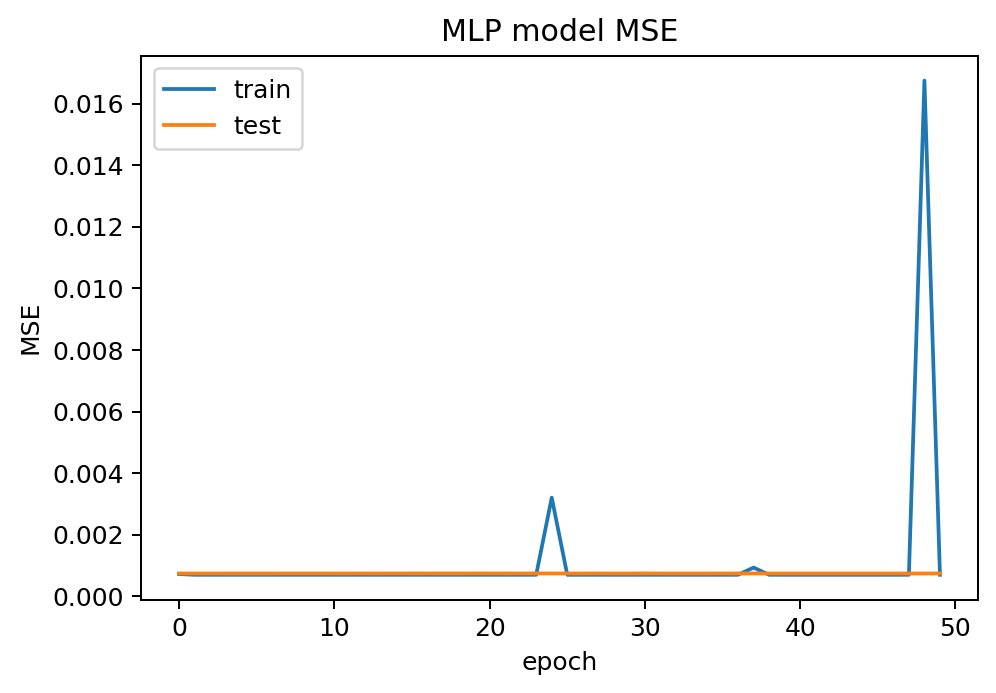

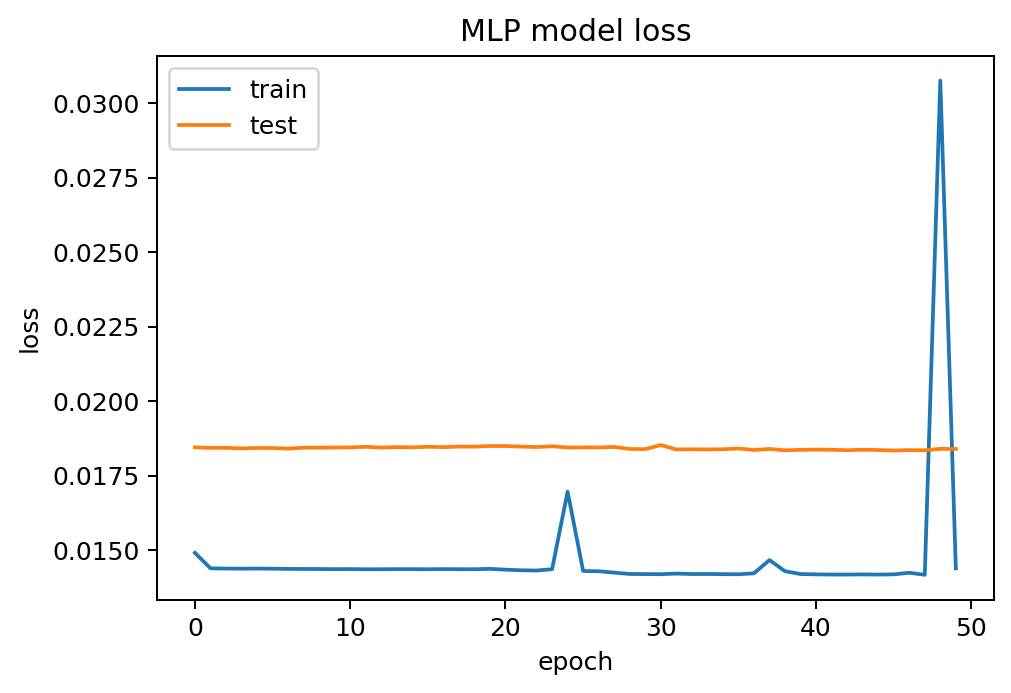

In [255]:
plt.plot(training.history['mean_squared_error'])
if 'val_mean_squared_error'  in training.history:
    plt.plot(training.history['val_mean_squared_error'])
plt.title("MLP model MSE")
plt.ylabel("MSE")
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


plt.plot(training.history['loss'])
if 'val_loss'  in training.history:
    plt.plot(training.history['val_loss'])
plt.title("MLP model loss")
plt.ylabel("loss")
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc = 'upper left')
plt.show()